In [1]:
# 2022.07.12

In [24]:
import os
import numpy as np

In [25]:
os.chdir("D:/Data/scipy-japan-2019-master/")

In [150]:
def print_info(a):
    print('number of elements:', a.size)
    print('number of dimensions:', a.ndim)
    print('shape:', a.shape)
    print('data type:', a.dtype)
    print('strides:', a.strides)
    print('flags:')
    print(a.flags)

# Exercise
Generate a `10X3` array of random numbers. From each row, pick the column containing the number closest to 0.75.

*Hint*: use of `np.abs` and `np.argmin` to find the column `j` that contains the closest element in each row `i`. The final result should be a vector of Integers of shape `(10,)`.

In [3]:
arr = np.random.random((10, 3))
arr

array([[0.74459892, 0.97659783, 0.2056693 ],
       [0.0089329 , 0.58837478, 0.94661059],
       [0.35760014, 0.70039534, 0.20678466],
       [0.20515222, 0.30150611, 0.51552786],
       [0.28283932, 0.97428146, 0.59177274],
       [0.84394652, 0.01981214, 0.05776358],
       [0.18300668, 0.31979835, 0.30916865],
       [0.75321311, 0.39768372, 0.17342078],
       [0.52225993, 0.30614162, 0.86014646],
       [0.68550705, 0.00301339, 0.88411033]])

In [16]:
# My code

In [12]:
np.argmin(np.abs(arr-0.75), axis=1)

array([0, 1, 1, 2, 2, 0, 1, 0, 2, 0], dtype=int64)

In [23]:
arr[np.arange(10), np.argmin(np.abs(arr-0.75), axis=1)]

array([0.74459892, 0.58837478, 0.70039534, 0.51552786, 0.59177274,
       0.84394652, 0.31979835, 0.75321311, 0.86014646, 0.68550705])

In [17]:
# Answer

In [18]:
dist75 = np.abs(arr - 0.75)
dist75

array([[0.00540108, 0.22659783, 0.5443307 ],
       [0.7410671 , 0.16162522, 0.19661059],
       [0.39239986, 0.04960466, 0.54321534],
       [0.54484778, 0.44849389, 0.23447214],
       [0.46716068, 0.22428146, 0.15822726],
       [0.09394652, 0.73018786, 0.69223642],
       [0.56699332, 0.43020165, 0.44083135],
       [0.00321311, 0.35231628, 0.57657922],
       [0.22774007, 0.44385838, 0.11014646],
       [0.06449295, 0.74698661, 0.13411033]])

In [21]:
np.argmin(dist75, axis=1) # axis along columns

array([0, 1, 1, 2, 2, 0, 1, 0, 2, 0], dtype=int64)

In [220]:
# Find closest elements

In [222]:
col_indices = np.argmin(dist75, axis=1)
closest = arr[np.arange(arr.shape[0]), col_indices]

In [223]:
closest

array([0.74459892, 0.58837478, 0.70039534, 0.51552786, 0.59177274,
       0.84394652, 0.31979835, 0.75321311, 0.86014646, 0.68550705])

# Exercise
Some applications, such as clustering, are computationally expensive, and wouldn't work without first doing some form of *feature selection*, where we discard most of the data and keep only what we think will be most useful. One simple version is to keep only the genes with the most variance (as these will be more informative thatn genes that don't vary between patients).

* Find the variance across patients of all the genes (rows) in the expression dataset.
* Use `np.argsort` to find the location of the 1,500 most variable genes.
* Use these indices to produce a shape `(1500, 375)` matrix containing only the most variable genes.

In [26]:
expr = np.load('expr.npy')

In [27]:
row_variance = np.var(expr, axis=1) # axis along columns

In [28]:
row_variance.shape

(20500,)

In [63]:
row_variance_order = np.argsort(row_variance)[::-1] # descending order

In [64]:
most_variable_rows = row_variance_order[-1500:] # last 1500 variables

In [65]:
row_variance_order.shape

(20500,)

In [66]:
row_variance_order

array([ 7424, 10080, 14683, ..., 17851,  1800, 14473], dtype=int64)

In [67]:
most_variable_rows.shape

(1500,)

In [68]:
most_variable_rows

array([17987,  9840,  1691, ..., 17851,  1800, 14473], dtype=int64)

In [69]:
most_variable_data = expr[most_variable_rows] # .loc[orders]

In [70]:
most_variable_data.shape

(1500, 375)

In [71]:
# my code

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline

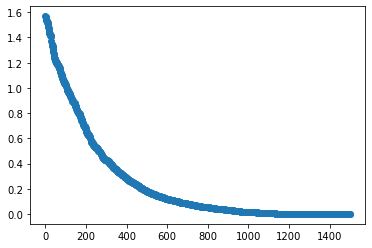

In [75]:
plt.scatter(np.arange(1500), row_variance[most_variable_rows])

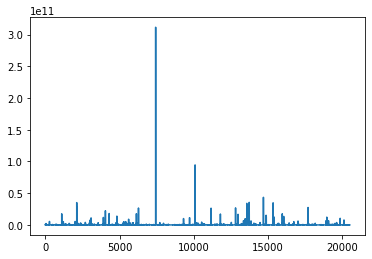

In [76]:
plt.plot(row_variance)

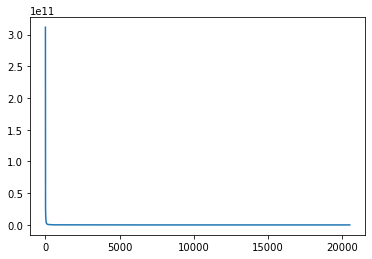

In [82]:
sorted_row_variance = sorted(row_variance, reverse=True)
plt.plot(sorted_row_variance)

# Exercise
with genes datasets

In [83]:
lib_size = np.sum(expr, axis=0)

In [85]:
print(expr.shape)
print(lib_size.shape)
print(lib_size[np.newaxis, :].shape)

(20500, 375)
(375,)
(1, 375)


`numpy` is doing implicitly broadcasting with `np.newaxis`.

In [88]:
np.all([True, True, False])

False

In [89]:
np.all([True, True, True])

True

Is dividing by `lib_size` equals to dividing by `lib_size[np.newaxis, :]`?

In [90]:
np.all(expr / lib_size ==
       expr / lib_size[np.newaxis, :])

True

In [91]:
expr_lib = expr / lib_size

We multiply by $10^6$ in order to keep the number on a readable scale.m

In [93]:
expr_lib *= 1e6

Finally, we must normalize by the gene length (in kb) to produce a measure of expression called Reads Per Kilobase per Million reads (RPKM). We start by loading the gene lengths in *bases*. (1 kilobase = 1,000 bases.)

In [94]:
gene_len = np.load('gene-lens.npy')
print(gene_len.shape)

(20500,)


# Exercise
broadcast `expr_lib`and `gene_len` together to produce RPKM

Reminder:

$RPKM = \frac{C}{N \times 10^-6 \times L \times 10^-3} = \frac{10 ^\circ C}{NL}$

where $C$ is the raw counts, $N$ is the library size (in reads) and $L$ is the gene length (in bases.)

In [97]:
# my code

In [105]:
rpkm = expr_lib / gene_len.reshape(-1, 1) * 1e3

In [106]:
rpkm.shape

(20500, 375)

In [96]:
# answer

In [98]:
gene_len.shape

(20500,)

In [99]:
gene_len[:, np.newaxis].shape

(20500, 1)

In [100]:
expr.shape

(20500, 375)

You can see that these two things can be broadcasted.

In [107]:
rpkm = expr_lib / gene_len[:, np.newaxis] * 1e3

In [108]:
rpkm.shape

(20500, 375)

In order to visualize our handywork, we customize a function.

In [121]:
from matplotlib import pyplot as plt
from scipy import stats

def plot_col_density(data, xlim=None, *args, **kwargs):
    # Use gaussian smoothing to estimate the density
    density_per_col = [stats.kde.gaussian_kde(col) for col in data.T]
    if xlim is not None:
        m, M = xlim
    else:
        m, M = np.min(data), np.max(data)
    x = np.linspace(m, M, 100)

    fig, ax = plt.subplots()
    for density in density_per_col:
        ax.plot(x, density(x), *args, **kwargs)
    ax.set_xlabel('log-counts')
    ax.set_ylabel('frequency')
    if xlim is not None:
        ax.set_xlim(xlim)
    plt.show()

In [122]:
%config InlinBackend.figure_format = 'retina'

```
>>> print(density_per_col[:5])
[<scipy.stats.kde.gaussian_kde object at 0x000002E6DA61A5E0>, <scipy.stats.kde.gaussian_kde object at 0x000002E6DA5F71C0>, <scipy.stats.kde.gaussian_kde object at 0x000002E6DA5F7340>, <scipy.stats.kde.gaussian_kde object at 0x000002E6DAF8B040>, <scipy.stats.kde.gaussian_kde object at 0x000002E6DAF8B370>]
```

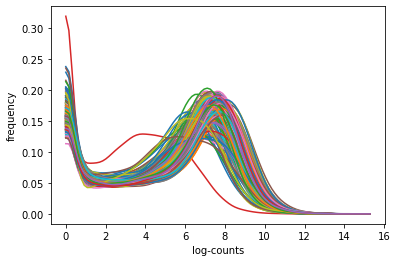

In [123]:
plot_col_density(np.log(expr+1))

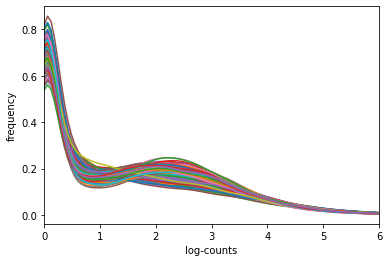

In [124]:
plot_col_density(np.log(rpkm+1), xlim=(0,6))

# Exercise: 3D Broadcasting

Below, using broadcasting, produce the array containing the sum of every element in `x` with every element in `y`. That is, produce an array `z` such that `z[i, j, k]` contains either the sum of `y[i]` and `x[j, k]` OR the sum of `x[i, j]` and `y[k]`.

In [125]:
x = np.random.random(size=(3, 5))
y = np.random.randint(10, size=8)

In [126]:
x.shape

(3, 5)

In [127]:
y.shape

(8,)

In [130]:
# my code

In [129]:
x[:, np.newaxis, :] + y[np.newaxis, :, np.newaxis]

array([[[8.1039564 , 8.75588694, 8.32059277, 8.58251739, 8.88778609],
        [6.1039564 , 6.75588694, 6.32059277, 6.58251739, 6.88778609],
        [7.1039564 , 7.75588694, 7.32059277, 7.58251739, 7.88778609],
        [7.1039564 , 7.75588694, 7.32059277, 7.58251739, 7.88778609],
        [0.1039564 , 0.75588694, 0.32059277, 0.58251739, 0.88778609],
        [7.1039564 , 7.75588694, 7.32059277, 7.58251739, 7.88778609],
        [4.1039564 , 4.75588694, 4.32059277, 4.58251739, 4.88778609],
        [5.1039564 , 5.75588694, 5.32059277, 5.58251739, 5.88778609]],

       [[8.47746091, 8.04850797, 8.59669034, 8.07695216, 8.70053821],
        [6.47746091, 6.04850797, 6.59669034, 6.07695216, 6.70053821],
        [7.47746091, 7.04850797, 7.59669034, 7.07695216, 7.70053821],
        [7.47746091, 7.04850797, 7.59669034, 7.07695216, 7.70053821],
        [0.47746091, 0.04850797, 0.59669034, 0.07695216, 0.70053821],
        [7.47746091, 7.04850797, 7.59669034, 7.07695216, 7.70053821],
        [4.4774609

In [135]:
# answer

In [136]:
z = x + y[:, np.newaxis, np.newaxis]

In [137]:
z.shape

(8, 3, 5)

In [138]:
z = x[:, :, np.newaxis] + y

In [139]:
z = x[..., np.newaxis] + y

In [140]:
z.shape

(3, 5, 8)

In [142]:
z = x[..., np.newaxis] + y[np.newaxis, np.newaxis, :] # very explicit

In [143]:
z.shape

(3, 5, 8)

# Exercise: ndarray attributes

In [157]:
x = np.random.random((3, 2)).astype(np.float32)

Try to answer these without looking at `x`. Then, try them out with the `print_info` function.

* What is the shape of `x`?
* What are the strides of `x`?
* Is `x` `C-CONTIGUOUS`, `F-CONTIGUOUS`, or neither?

Now let `y = repeat(x, 4)`. What is its shape? What are its strides? Is it contiguous?

In [158]:
def repeat(arr, n):
    return np.lib.stride_tricks.as_strided(arr,
                                           shape=(n,) + arr.shape,
                                           strides=(0,) + arr.strides)

In [159]:
# C-CONTIGUOUS: NumPy uses C-ordering by default.

In [160]:
x.shape

(3, 2)

In [161]:
x.strides

(8, 4)

In [162]:
x.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

In [163]:
y = repeat(x, 4)

In [164]:
print_info(y)

number of elements: 24
number of dimensions: 3
shape: (4, 3, 2)
data type: float32
strides: (0, 8, 4)
flags:
  C_CONTIGUOUS : False
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False



In [165]:
# In general, when you use stride tricks, you would end up with the none contiguous array.

# Exercise: `np.lib.stride_tricks.as_strided`

Use `as_strided` to produce a sliding-window view of a 1D array.

In [166]:
def sliding_window(arr, size=2):
    """Produce an array of sliding window views of `arr`
    
    Parameters
    ----------
    arr : 1D array, shape (N,)
        The input array.
    size : int, optional
        The size of the sliding window.
        
    Returns
    -------
    arr_slide : 2D array, shape (N - size + 1, size)
        The sliding windows of size `size` of `arr`.
        
    Examples
    --------
    >>> a = np.array([0, 1, 2, 3])
    >>> sliding_window(a, 2)
    array([[0, 1],
           [1, 2],
           [2, 3]])
    """
    stride = arr.strides[0]
    n_windows = arr.size - size + 1
    return np.lib.stride_tricks.as_strided(arr,
                                           shape=(n_windows, size),
                                           strides=(stride, stride))

In [167]:
# test your code here

sliding_window(np.arange(8), 3)

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4],
       [3, 4, 5],
       [4, 5, 6],
       [5, 6, 7]])

In [168]:
sliding_window(np.arange(8), 2)

array([[0, 1],
       [1, 2],
       [2, 3],
       [3, 4],
       [4, 5],
       [5, 6],
       [6, 7]])

# Exercise

Use `sliding_window` to implement mean filtering, in which every value in an array is replaced by the mean of it and its neighbors. This is a basic operation in signal processing - *the simplest convolutions*.

This is the simple tricks to reduce the noise.

In [169]:
def mean_filter(signal, window_size=3):
    """Apply a mean filter to the input with the desired window size.
    
    Parameters
    ----------
    signal : 1D array, shape (M,)
        The input signal.
    window_size : int, optional
        The size of the window along which to compute the mean.
        
    Returns
    -------
    filtered : 1D array, shape (M - window_size + 1,)
        The filtered signal.
    """
    signal_sliding = sliding_window(signal, window_size)
    filtered = np.mean(signal_sliding, axis=1)
    return filtered

To test your function, we will use the example of a *difference filter*, which finds the location of changes in a signal using convolution. When the signal is perfectly noiseless, it works great:

In [171]:
signal = np.zeros(100, np.float_)
signal[30:60] = 1

diff = np.array([1, 0, -1])
from scipy import ndimage as ndi
dsignal = ndi.convolve(signal, diff)

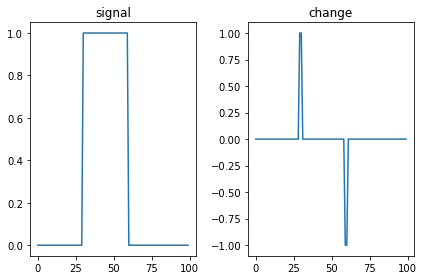

In [172]:
fig, ax = plt.subplots(1, 2)
ax[0].plot(signal)
ax[0].set_title('signal')
ax[1].plot(dsignal)
ax[1].set_title('change')
fig.tight_layout()

The main problem with this kind of difference filter is very sensitive to noise. So if your signal is a little jittery, this would amplify the jitters.

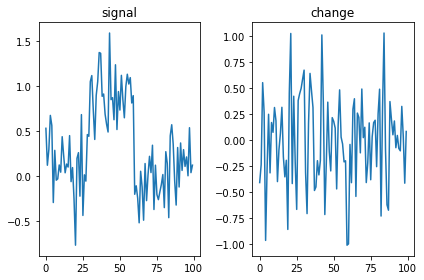

In [173]:
np.random.seed(0)
signal_noisy = signal + np.random.normal(0, 0.3, size=signal.shape)
dsignal_noisy = ndi.convolve(signal_noisy, diff)

fig, ax = plt.subplots(1, 2)
ax[0].plot(signal_noisy)
ax[0].set_title('signal')
ax[1].plot(dsignal_noisy)
ax[1].set_title('change')
fig.tight_layout()

Try mean filtering with difference window size to see whether the change signal becomes more apparent.

In [187]:
filtered_diff = ndi.convolve(mean_filter(signal_noisy, window_size=5), diff)

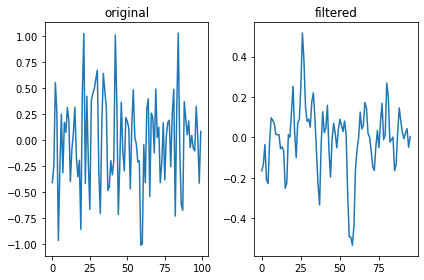

In [188]:
fig, ax = plt.subplots(1, 2)
ax[0].plot(dsignal_noisy)
ax[0].set_title('original')
ax[1].plot(filtered_diff)
ax[1].set_title('filtered')
fig.tight_layout()

# Exercise: padding

What is the shape of your mean-filtered signal?

...

Oops! We've shortened the signal, which means that our indices have changed: `signal_filtered[i]` does not correspond to the signal around `signal[i]`.

Use `np.pad` to add some "fake" data around signal before filtering, so that the filtered result has the same shape as the input.

In [191]:
print(signal_noisy.shape)
print(dsignal_noisy.shape)
print(filtered_diff.shape)

(100,)
(100,)
(96,)


In [197]:
def mean_filter_padded(signal, window_size=3):
    pad_size = window_size // 2
    signal_padded = np.pad(signal, pad_size, mode='reflect')
    return mean_filter(signal_padded, window_size)

In [198]:
filtered_diff_padded = ndi.convolve(mean_filter_padded(signal_noisy, window_size=5), diff)

In [199]:
print(signal_noisy.shape)
print(dsignal_noisy.shape)
print(filtered_diff_padded.shape)

(100,)
(100,)
(100,)


# Exercise: Gaussian filtering

It turns out that mean filtering is not the "optimal" way to recover your signal, assuming certain properties of the noise. For that, we use Gaussian filtering, which uses a weighted mean of the sliding window elements. The weights are given by the famous Gaussian bell-shaped distribution. For example, here are the weights for a window size of 17:

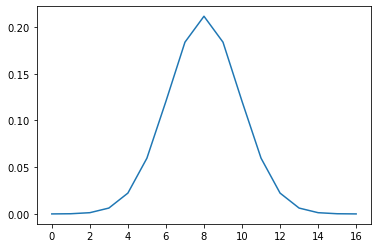

In [200]:
weight = np.exp(-(np.arange(-8, 9) / (8/3))**2)
weight /= np.sum(weight)  ## ensure overall intensity of signal doesn't change
fig, ax = plt.subplots()
ax.plot(weight)

In [201]:
weight.size

17

In [204]:
windows = sliding_window(signal_noisy, size=17)
print(windows.shape)
print(weight.shape)

(84, 17)
(17,)


In [205]:
# Are they compatible to braodcast?

In [207]:
weighted = windows * weight
filtered_gaussian = np.sum(weighted, axis=1)

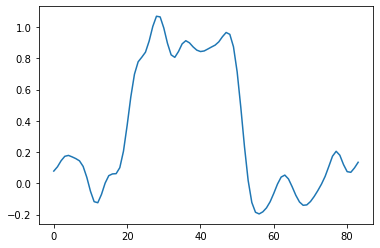

In [213]:
fig, ax = plt.subplots()
ax.plot(filtered_gaussian)

In [212]:
diff_gaussian = ndi.convolve(filtered_gaussian, diff)

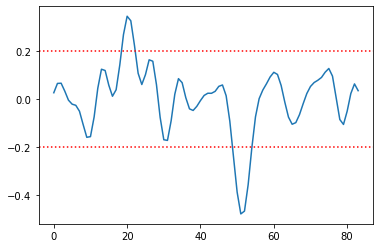

In [219]:
fig, ax = plt.subplots()
ax.plot(diff_gaussian)
ax.axhline(y=0.2, c='red', linestyle=':')
ax.axhline(y=-0.2, c='red', linestyle=':')

# Fancy indexing
You can index arrays with slicing, but also with boolean arrays (including broadcasting!), integer arrays, and individual indices along multiple dimensions.

In [224]:
values = np.array([0, 5, 99])
selector = np.random.randint(0, 3, size=(3, 4))
print(selector)
print(values[selector]) 

[[0 0 1 2]
 [1 1 0 0]
 [1 2 0 2]]
[[ 0  0  5 99]
 [ 5  5  0  0]
 [ 5 99  0 99]]


In [225]:
values[[2, 1, 0]]

array([99,  5,  0])

In [226]:
values[[1, 2, 2, 2, 0]]

array([ 5, 99, 99, 99,  0])

In [227]:
values[np.array([[1, 2, 2, 2, 0], [1, 1, 1, 1, 1]])]

array([[ 5, 99, 99, 99,  0],
       [ 5,  5,  5,  5,  5]])

In [229]:
# It needs to be an array. It can't be just a list.

In [230]:
relabeled = values[selector]
has_large_cols = np.any(relabeled > 10, axis=1)
print(relabeled[has_large_cols])

[[ 0  0  5 99]
 [ 5 99  0 99]]


In [231]:
has_large_cols

array([ True, False,  True])

```python
ndarray[list(row_indices), list(col_indices)]
```

In [ ]:
# Univariate indexing to Multivariate indexing, this called Fancy indexing.

# Exercise

Use boolean indexing and broadcasting to select the columns of `relabeled` that do not contain 99.

In [232]:
# my code

In [237]:
has_small_cols = np.all(relabeled < 10, axis=0)
print(relabeled[:, has_small_cols])

[[0 5]
 [5 0]
 [5 0]]


In [238]:
# answer

In [239]:
no99 = ~np.any(relabeled == 99, axis=0)
relabeled[:, no99]

array([[0, 5],
       [5, 0],
       [5, 0]])